<a href="https://colab.research.google.com/github/RafaelRomeroTechDev/Challenge_Alura_Store/blob/main/Challenge_Alura_Store_Rafael_Romero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**¡Bienvenidos al primer desafío!**
Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

##**Lo que practicarás:**
1. Cargue y manipule datos CSV con la biblioteca Pandas.
2. Cree visualizaciones de datos con la biblioteca Matplotlib.
3. Analice métricas como ingresos, reseñas y rendimiento de ventas.

##**Requisitos:**

###**Analizar datos de la tienda:**

1. Debes evaluar información como los ingresos, las categorías más vendidas,las reseñas de los clientes, los productos más vendidos y el envío promedio.



###**Crear gráficos para visualización:**

1. Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.

2. Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.



### Importacion de datos

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

1. Se crean dos listas, una que contiene las cuatro tiendas y otra que contiene la suma de los ingresos de cada tienda en la columna "Precio"
2. Se crea un bucle for creando una para cada tienda en la cual se almacena los valores de los ingresos resultados de las ventas y una variable con la suma de ingresos de cada tienda
3. Se imprime los valores de la suma de los ingresos de cada tienda a partir de la lista creada en el paso 1

In [2]:
tiendas = [tienda1, tienda2, tienda3, tienda4]  # Lista de las tiendas
sumas_precios = [] #Lista para almacenar las sumas de cada tienda

for tienda in tiendas:
    tienda_precios = tienda['Precio'].tolist() # Convertir a lista directamente
    suma_tienda_precios = sum(tienda_precios)
    sumas_precios.append(suma_tienda_precios) # Agregamos la suma a la lista

print(f'Ingreso total: Tienda ${sumas_precios[0]:,}, Tienda2 ${sumas_precios[1]:,}, Tienda3 ${sumas_precios[2]:,}, Tienda4 ${sumas_precios[3]:,}')


Ingreso total: Tienda $1,150,880,400.0, Tienda2 $1,116,343,500.0, Tienda3 $1,098,019,600.0, Tienda4 $1,038,375,700.0


4. Se crea la grafica de del total de ingresos por tiendas

- Se utiliza la funcion np.mean de NumPy para calcular el promedio de la lista de suma de ingresos de la tienda

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ingreso_medio = np.mean(sumas_precios)

- Para colocar los nombres de las tiendas en el grafico creo una lista con los nombres de las tiendas
- En el primer grafico los valores de los ingresos salian sin formato, cree la funcion formatoMillones para que que quite los ceros de millones y agregue la letra "M" de millones

In [4]:
nombre_tiendas = [f'Tienda_{i+1}' for i in range(len(tiendas))]

def formatoMillones(x, pos):
    return f'{x / 1e6:.0f}M'

- Ahora generamos el grafico, el formato se le dio luego de varias pruebas para que quedara de este modo con la funcion plt

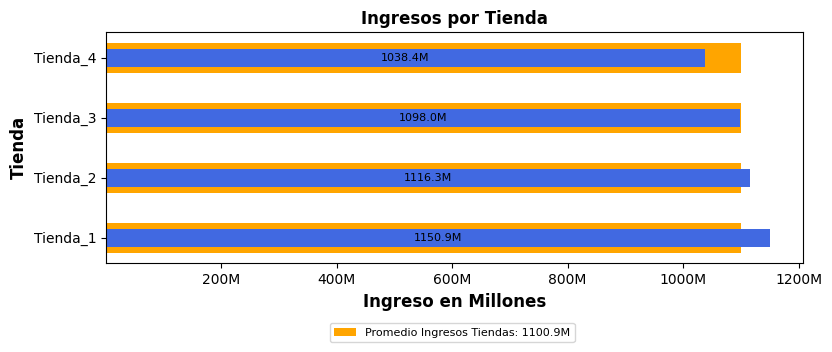

In [5]:
plt.figure(figsize=(9, 3))
plt.barh(nombre_tiendas, [ingreso_medio] * len(nombre_tiendas), height=0.5, color='orange', alpha=1, left=0.5, label=f'Promedio Ingresos Tiendas: {ingreso_medio / 1e6:.1f}M')
barras = plt.barh(nombre_tiendas, sumas_precios, height=0.3,color='royalblue')

plt.title('Ingresos por Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Tienda', fontsize=12, fontweight='bold')
plt.xlabel('Ingreso en Millones', fontsize=12, fontweight='bold')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatoMillones))

for bar in barras:
  width = bar.get_width()
  plt.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width/1e6:.1f}M', va='center', ha='center', fontsize=8)

plt.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.68, -0.3))
plt.show()

#2. Ventas por Categoria

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [6]:
def calcular_datos_producto(tienda):
    """
    Calcula el total de elementos y el precio total por categoría de producto para una tienda.

    Args:
        tienda (pd.DataFrame): DataFrame de la tienda.

    Returns:
        dict: Un diccionario donde las claves son las categorías de productos y los valores
              son tuplas con el total de elementos y el precio total.
    """
    # Agrupa los datos por 'Categoria del Producto' y calcula el tamaño de cada grupo y la suma del precio.
    grupo_categoria = tienda.groupby('Categoría del Producto').agg(
        total_elementos=('Categoría del Producto', 'size'),
        precio_total=('Precio', 'sum')
    )

    # Convierte el resultado a un diccionario de Python para facilitar el acceso.
    diccionario_resultado = grupo_categoria.to_dict(orient='index')

    # Convierte los valores del diccionario a tuplas
    for key, value in diccionario_resultado.items():
        diccionario_resultado[key] = (value['total_elementos'], value['precio_total'])

    return diccionario_resultado

# Calcula los datos para cada tienda
tienda1_datos = calcular_datos_producto(tienda1)
tienda2_datos = calcular_datos_producto(tienda2)
tienda3_datos = calcular_datos_producto(tienda3)
tienda4_datos = calcular_datos_producto(tienda4)

"""# Imprime los resultados
print("Datos de la Tienda 1:")
print(tienda1_datos)
print("\nDatos de la Tienda 2:")
print(tienda2_datos)
print("\nDatos de la Tienda 3:")
print(tienda3_datos)
print("\nDatos de la Tienda 4:")
print(tienda4_datos)"""

# Imprime los resultados de forma legible
print("Datos de la Tienda 1:")
for categoria, (total_elementos, precio_total) in tienda1_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 2:")
for categoria, (total_elementos, precio_total) in tienda2_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 3:")
for categoria, (total_elementos, precio_total) in tienda3_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")

print("\nDatos de la Tienda 4:")
for categoria, (total_elementos, precio_total) in tienda4_datos.items():
    print(f"  Categoría: {categoria}, Total de Elementos: {total_elementos}, Precio Total: ${precio_total:,.0f}")


Datos de la Tienda 1:
  Categoría: Artículos para el hogar, Total de Elementos: 171, Precio Total: $12,698,400
  Categoría: Deportes y diversión, Total de Elementos: 284, Precio Total: $39,290,000
  Categoría: Electrodomésticos, Total de Elementos: 312, Precio Total: $363,685,200
  Categoría: Electrónicos, Total de Elementos: 448, Precio Total: $429,493,500
  Categoría: Instrumentos musicales, Total de Elementos: 182, Precio Total: $91,299,000
  Categoría: Juguetes, Total de Elementos: 324, Precio Total: $17,995,700
  Categoría: Libros, Total de Elementos: 173, Precio Total: $8,784,900
  Categoría: Muebles, Total de Elementos: 465, Precio Total: $187,633,700

Datos de la Tienda 2:
  Categoría: Artículos para el hogar, Total de Elementos: 181, Precio Total: $14,746,900
  Categoría: Deportes y diversión, Total de Elementos: 275, Precio Total: $34,744,500
  Categoría: Electrodomésticos, Total de Elementos: 305, Precio Total: $348,567,800
  Categoría: Electrónicos, Total de Elementos: 422,

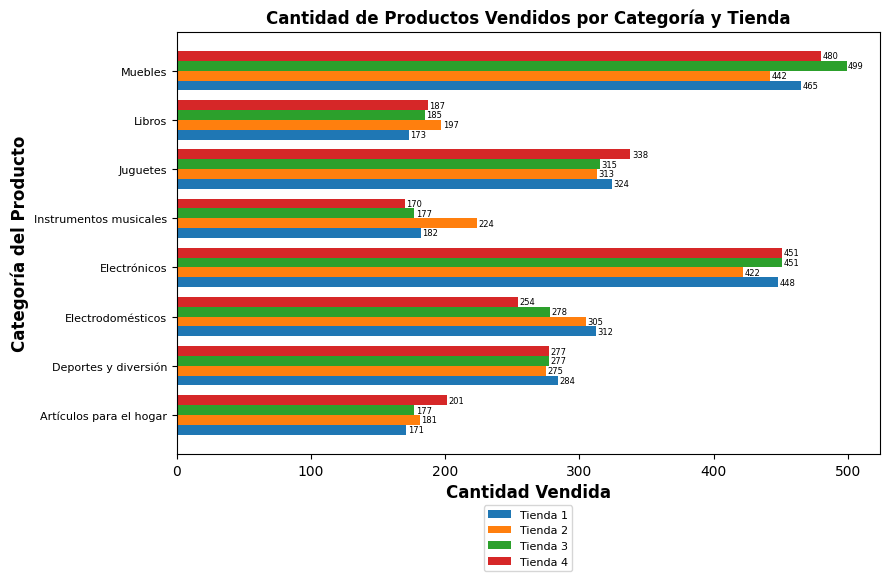

In [7]:
# Función para crear el gráfico de barras agrupado a partir de los diccionarios
def crear_grafico_desde_diccionarios(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de barras agrupado para visualizar las ventas por categoría en diferentes tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Preparar los datos para el gráfico:
    #    - Convertir los diccionarios a un formato adecuado para el gráfico (DataFrame).
    data_grafico = []
    for i, datos_tienda in enumerate(datos_tiendas):
        # Crea una lista de diccionarios para cada tienda
        lista_categorias = [{'Categoria': categoria, 'Cantidad': cantidad, 'Tienda': nombres_tiendas[i]}
                            for categoria, (cantidad, _) in datos_tienda.items()]
        data_grafico.extend(lista_categorias)  # Extiende la lista, no append para aplanar la lista de listas

    data_grafico_consolidado = pd.DataFrame(data_grafico)  # Convierte la lista de diccionarios a DataFrame

    # 2. Crear el gráfico de barras agrupado usando matplotlib:
    fig, ax = plt.subplots(figsize=(9, 6))  # Ajusta el tamaño de la figura según sea necesario
    n_tiendas = len(nombres_tiendas)
    ancho_barra = 0.8 / n_tiendas  # Ancho de cada barra dentro de un grupo
    posiciones_grupos = range(len(data_grafico_consolidado['Categoria'].unique()))

    for i, nombre_tienda in enumerate(nombres_tiendas):
        # Filtra los datos para la tienda actual
        data_tienda = data_grafico_consolidado[data_grafico_consolidado['Tienda'] == nombre_tienda]
        # Calcula las posiciones de las barras para la tienda actual
        posiciones_barras = [pos + i * ancho_barra for pos in posiciones_grupos]
        # Dibuja las barras para la tienda actual
        barras = ax.barh(posiciones_barras, data_tienda['Cantidad'], height=ancho_barra, label=nombre_tienda) #cambio a barh

        # Añadir etiquetas de cantidad a la derecha de cada barra
        for barra in barras:
            cantidad = barra.get_width()
            ax.text(cantidad + 1, barra.get_y() + barra.get_height() / 2,
                    f'{cantidad}', va='center', ha='left', fontsize=6)

    # Añade etiquetas y título
    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_xlabel('Cantidad Vendida', fontsize=12, fontweight='bold') #cambio ylabel por xlabel
    ax.set_title('Cantidad de Productos Vendidos por Categoría y Tienda', fontsize=12, fontweight='bold')
    ax.set_yticks([pos + (n_tiendas - 1) * ancho_barra / 2 for pos in posiciones_grupos])  # Centra las etiquetas de las categorías
    ax.set_yticklabels(data_grafico_consolidado['Categoria'].unique(),  ha="right", fontsize=8)  # Rotar etiquetas para mejor legibilidad #cambio xticklabels por yticklabels
    ax.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.57, -0.2))  # Muestra la leyenda para identificar las tiendas

    plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
    plt.show()  # Muestra el gráfico

# Llama a la función para crear el gráfico usando los diccionarios
crear_grafico_desde_diccionarios([tienda1_datos, tienda2_datos, tienda3_datos, tienda4_datos], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])


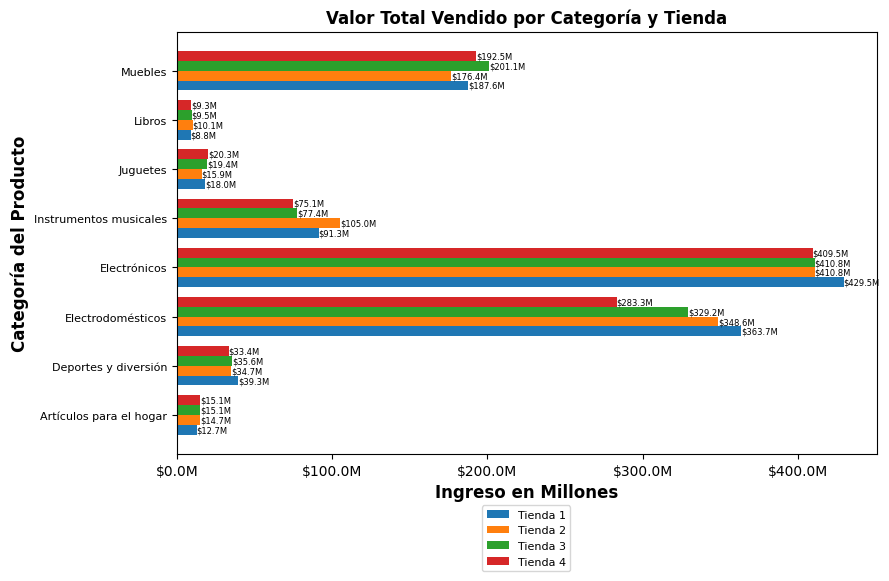

In [8]:
# Función para crear el gráfico de barras agrupado a partir de los diccionarios
def crear_grafico_valor_por_categoria(datos_tiendas, nombres_tiendas):
    """
    Crea un gráfico de barras agrupado para visualizar el valor total vendido por categoría en diferentes tiendas.

    Args:
        datos_tiendas (list): Una lista de diccionarios, donde cada diccionario representa los datos de una tienda.
        nombres_tiendas (list): Una lista de nombres para las tiendas.
    """
    # 1. Preparar los datos para el gráfico:
    #    - Convertir los diccionarios a un formato adecuado para el gráfico (DataFrame).
    data_grafico = []
    for i, datos_tienda in enumerate(datos_tiendas):
        # Crea una lista de diccionarios para cada tienda, extrayendo el precio total
        lista_categorias = [{'Categoria': categoria, 'Valor_Vendido': valor, 'Tienda': nombres_tiendas[i]}
                            for categoria, (_, valor) in datos_tienda.items()]  # Cambiado para obtener el precio_total
        data_grafico.extend(lista_categorias)
    data_grafico_consolidado = pd.DataFrame(data_grafico)

    # 2. Crear el gráfico de barras agrupado usando matplotlib:
    fig, ax = plt.subplots(figsize=(9, 6))
    n_tiendas = len(nombres_tiendas)
    ancho_barra = 0.8 / n_tiendas
    posiciones_grupos = range(len(data_grafico_consolidado['Categoria'].unique()))

    def formatoMillones(x, pos):
        return f'${x / 1e6:.1f}M'

    for i, nombre_tienda in enumerate(nombres_tiendas):
        data_tienda = data_grafico_consolidado[data_grafico_consolidado['Tienda'] == nombre_tienda]
        posiciones_barras = [pos + i * ancho_barra for pos in posiciones_grupos]
        barras = ax.barh(posiciones_barras, data_tienda['Valor_Vendido'], height=ancho_barra, label=nombre_tienda) #cambio a barh

        # Añadir etiquetas de valor a la derecha de cada barra
        for barra in barras:
            valor = barra.get_width()
            ax.text(valor + 1, barra.get_y() + barra.get_height() / 2,
                    f'${valor/1e6:.1f}M', va='center', ha='left', fontsize=6)

    ax.set_ylabel('Categoría del Producto', fontsize=12, fontweight='bold') #cambio xlabel por ylabel
    ax.set_xlabel('Ingreso en Millones', fontsize=12, fontweight='bold') #cambio ylabel por xlabel y el nombre
    ax.set_title('Valor Total Vendido por Categoría y Tienda', fontsize=12, fontweight='bold') #cambio el titulo
    ax.set_yticks([pos + (n_tiendas - 1) * ancho_barra / 2 for pos in posiciones_grupos])
    ax.set_yticklabels(data_grafico_consolidado['Categoria'].unique(),  ha="right", fontsize=8)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(formatoMillones))
    ax.legend(fontsize=8, loc='center right', bbox_to_anchor=(0.57, -0.2))

    plt.tight_layout()
    plt.show()

# Llama a la función para crear el gráfico usando los diccionarios
crear_grafico_valor_por_categoria([tienda1_datos, tienda2_datos, tienda3_datos, tienda4_datos], ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])


#3. Valoracion media por tienda
En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.